In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler , LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE # Changed SMOT to SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
application = pd.read_csv('/content/drive/MyDrive/Final Project/application_record.csv')
credit = pd.read_csv('/content/drive/MyDrive/Final Project/credit_record.csv')

In [ ]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
application.duplicated(subset='ID').sum()

np.int64(47)

In [ ]:
application.drop_duplicates(subset='ID',inplace=True)

In [ ]:
application.duplicated(subset='ID').sum()

np.int64(0)

In [ ]:
df=pd.merge(application,credit,on='ID',how='inner')

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
def data_info(df):
    cols = []
    unique = []
    n_uniques = []
    dtypes = []
    nulls = []

    for col in df.columns:
        cols.append(col)
        dtypes.append(df[col].dtype)
        n_uniques.append(df[col].nunique())
        unique.append(df[col].unique())
        nulls.append(df[col].isna().sum())

    return pd.DataFrame({'Columns': cols, 'n_uniques': n_uniques,
                         'unique': unique, 'dtypes': dtypes, "NULLS": nulls})

In [ ]:
data_info(df)

,Columns,n_uniques,unique,dtypes,NULLS
0,ID,36457,"[5008804, 5008805, 5008806, 5008808, 5008809, ...",int64,0
1,CODE_GENDER,2,"[M, F]",object,0
2,FLAG_OWN_CAR,2,"[Y, N]",object,0
3,FLAG_OWN_REALTY,2,"[Y, N]",object,0
4,CNT_CHILDREN,9,"[0, 1, 3, 2, 4, 5, 14, 19, 7]",int64,0
5,AMT_INCOME_TOTAL,265,"[427500.0, 112500.0, 270000.0, 283500.0, 13500...",float64,0
6,NAME_INCOME_TYPE,5,"[Working, Commercial associate, Pensioner, Sta...",object,0
7,NAME_EDUCATION_TYPE,5,"[Higher education, Secondary / secondary speci...",object,0
8,NAME_FAMILY_STATUS,5,"[Civil marriage, Married, Single / not married...",object,0
9,NAME_HOUSING_TYPE,6,"[Rented apartment, House / apartment, Municipa...",object,0


In [ ]:
df.drop(columns=['FLAG_PHONE'],inplace=True)

In [ ]:
df.drop(columns=['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_EMAIL'],inplace=True)

In [ ]:
df["DAYS_BIRTH"]=(df["DAYS_BIRTH"].abs() //365)

In [ ]:
df.rename(columns={"DAYS_BIRTH":"AGE"},inplace=True)

In [ ]:
df["DAYS_EMPLOYED"]=(df["DAYS_EMPLOYED"].abs() //365)

In [ ]:
df.rename(columns={"DAYS_EMPLOYED":"YEARS_EMPLOYED"},inplace=True)

In [ ]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-12,0


In [ ]:
df= pd.get_dummies(df, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], drop_first=True)

# Convert only the newly created one-hot encoded columns to integer (0/1)
encoded_cols = ['CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y']  # Adjust based on your data
df[encoded_cols] = df[encoded_cols].astype(int)

In [ ]:
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,0,C,1,1,1
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-1,C,1,1,1
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-2,C,1,1,1
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-3,C,1,1,1
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-4,C,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-9,0,1,0,1
777711,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-10,2,1,0,1
777712,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-11,1,1,0,1
777713,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-12,0,1,0,1


In [ ]:
# Convert 'C' to a temporary placeholder (999) and 'X' to -1
df['STATUS'] = df['STATUS'].replace({'C': 999, 'X': -1}).astype(float)


In [ ]:


# Step 2: Shift only actual overdue values (0-5 → 1-6), leaving "C" (999) and "X" (-1) unchanged
df['STATUS'] = df['STATUS'].apply(lambda x: x + 1 if x in [0, 1, 2, 3, 4, 5] else x)


In [ ]:
df['STATUS'] = df['STATUS'].replace({999: 0})

In [ ]:
print(df['STATUS'].unique())


[ 0.  2.  1. -1.  6.  5.  4.  3.]


In [ ]:
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,0,0.0,1,1,1
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-1,0.0,1,1,1
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-2,0.0,1,1,1
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-3,0.0,1,1,1
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-4,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-9,1.0,1,0,1
777711,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-10,3.0,1,0,1
777712,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-11,2.0,1,0,1
777713,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-12,1.0,1,0,1


In [ ]:
print(df[['MONTHS_BALANCE', 'STATUS']].describe())

       MONTHS_BALANCE         STATUS
count   777715.000000  777715.000000
mean       -19.373564       0.226274
std         14.082208       0.804922
min        -60.000000      -1.000000
25%        -29.000000       0.000000
50%        -17.000000       0.000000
75%         -8.000000       1.000000
max          0.000000       6.000000


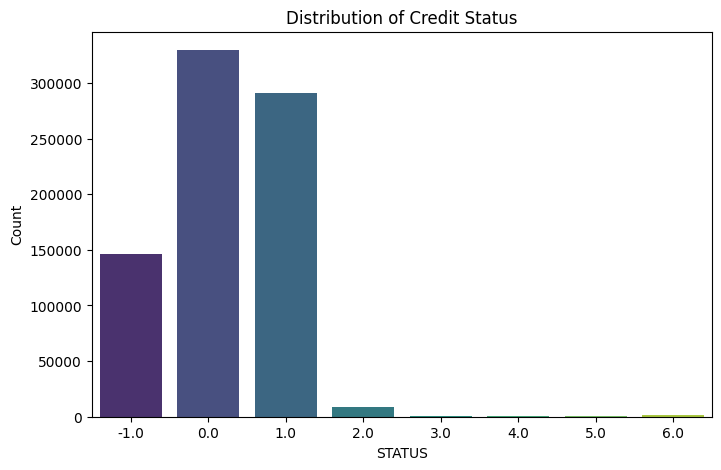

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['STATUS'], palette="viridis")
plt.xlabel("STATUS")
plt.ylabel("Count")
plt.title("Distribution of Credit Status")
plt.show()

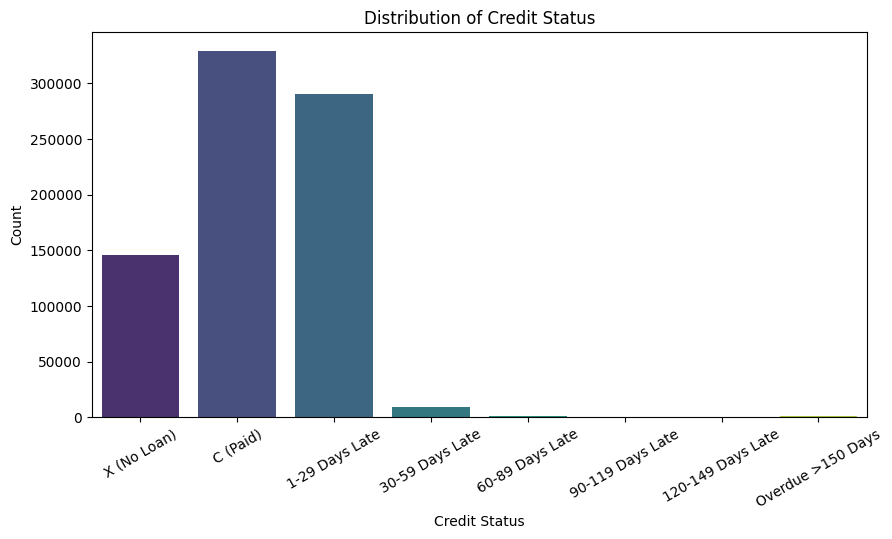

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define mapping for visualization
status_labels = {
    -1: "X (No Loan)",
     0: "C (Paid)",
     1: "1-29 Days Late",
     2: "30-59 Days Late",
     3: "60-89 Days Late",
     4: "90-119 Days Late",
     5: "120-149 Days Late",
     6: "Overdue >150 Days"
}

# Replace STATUS values with labels
df['STATUS_LABEL'] = df['STATUS'].map(status_labels)

# Plot with labeled categories
plt.figure(figsize=(10, 5))
sns.countplot(x=df['STATUS_LABEL'], palette="viridis", order=status_labels.values())
plt.xlabel("Credit Status")
plt.ylabel("Count")
plt.title("Distribution of Credit Status")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.show()


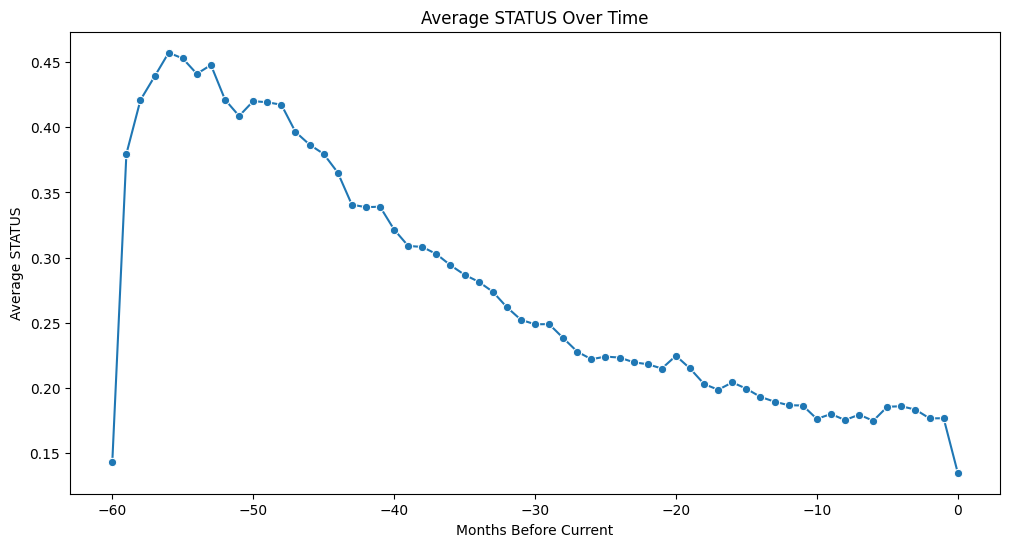

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="MONTHS_BALANCE", y="STATUS", estimator="mean", ci=None, marker="o")
plt.xlabel("Months Before Current")
plt.ylabel("Average STATUS")
plt.title("Average STATUS Over Time")
plt.show()

STATUS Distribution Before Aggregation:
STATUS
 0.0    329536
 1.0    290654
-1.0    145950
 2.0      8747
 6.0      1527
 3.0       801
 4.0       286
 5.0       214
Name: count, dtype: int64


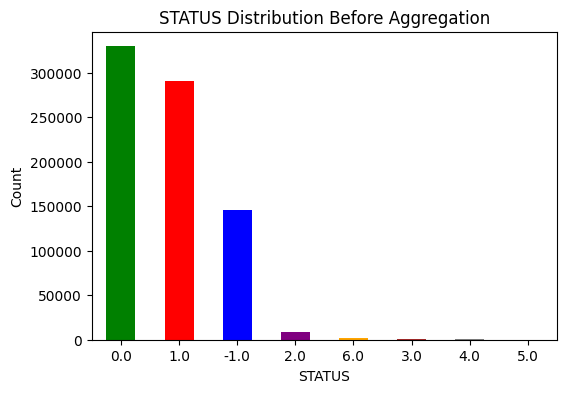

In [ ]:
import matplotlib.pyplot as plt

status_counts = df['STATUS'].value_counts()

print("STATUS Distribution Before Aggregation:")
print(status_counts)

plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color=['green', 'red', 'blue', 'purple', 'orange', 'brown', 'gray'])
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("STATUS Distribution Before Aggregation")
plt.show()

In [ ]:
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,0,0.0,1,1,1
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-1,0.0,1,1,1
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-2,0.0,1,1,1
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-3,0.0,1,1,1
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,NaN,2.0,-4,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-9,1.0,1,0,1
777711,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-10,3.0,1,0,1
777712,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-11,2.0,1,0,1
777713,5150337,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,Laborers,1.0,-12,1.0,1,0,1


In [ ]:
# Create a copy of the original DataFrame to store the transformed data
df_transformed = df.copy()

# List of categorical columns to encode
categorical_cols = [
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

# Dictionary to store mappings
label_mappings = {}

# Apply Label Encoding and store mappings
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df[col].astype(str))  # Convert to string if NaNs exist
    label_encoders[col] = le  # Store encoder for later use

    # Store mapping for reference
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))




In [ ]:
df_transformed

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,0,0.0,1,1,1
1,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,-1,0.0,1,1,1
2,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,-2,0.0,1,1,1
3,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,-3,0.0,1,1,1
4,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,-4,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,4,4,3,4,25,3,8,1.0,-9,1.0,1,0,1
777711,5150337,0,112500.0,4,4,3,4,25,3,8,1.0,-10,3.0,1,0,1
777712,5150337,0,112500.0,4,4,3,4,25,3,8,1.0,-11,2.0,1,0,1
777713,5150337,0,112500.0,4,4,3,4,25,3,8,1.0,-12,1.0,1,0,1


In [ ]:
label_mappings

{'NAME_INCOME_TYPE': {'Commercial associate': np.int64(0),
  'Pensioner': np.int64(1),
  'State servant': np.int64(2),
  'Student': np.int64(3),
  'Working': np.int64(4)},
 'NAME_EDUCATION_TYPE': {'Academic degree': np.int64(0),
  'Higher education': np.int64(1),
  'Incomplete higher': np.int64(2),
  'Lower secondary': np.int64(3),
  'Secondary / secondary special': np.int64(4)},
 'NAME_FAMILY_STATUS': {'Civil marriage': np.int64(0),
  'Married': np.int64(1),
  'Separated': np.int64(2),
  'Single / not married': np.int64(3),
  'Widow': np.int64(4)},
 'NAME_HOUSING_TYPE': {'Co-op apartment': np.int64(0),
  'House / apartment': np.int64(1),
  'Municipal apartment': np.int64(2),
  'Office apartment': np.int64(3),
  'Rented apartment': np.int64(4),
  'With parents': np.int64(5)},
 'OCCUPATION_TYPE': {'Accountants': np.int64(0),
  'Cleaning staff': np.int64(1),
  'Cooking staff': np.int64(2),
  'Core staff': np.int64(3),
  'Drivers': np.int64(4),
  'HR staff': np.int64(5),
  'High skill tec

In [ ]:
#from sklearn.model_selection import StratifiedKFold

#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#df = df.values
#X = df.iloc[ :, :-1].values
#y = df.iloc[ :, -1].values

In [ ]:
df_transformed

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,0,0.0,1,1,1
1,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,-1,0.0,1,1,1
2,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,-2,0.0,1,1,1
3,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,-3,0.0,1,1,1
4,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,-4,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,4,4,3,4,25,3,8,1.0,-9,1.0,1,0,1
777711,5150337,0,112500.0,4,4,3,4,25,3,8,1.0,-10,3.0,1,0,1
777712,5150337,0,112500.0,4,4,3,4,25,3,8,1.0,-11,2.0,1,0,1
777713,5150337,0,112500.0,4,4,3,4,25,3,8,1.0,-12,1.0,1,0,1


In [ ]:
print(df_transformed.isnull().sum())  # Shows missing values per column


ID                     0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
YEARS_EMPLOYED         0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
CODE_GENDER_M          0
FLAG_OWN_CAR_Y         0
FLAG_OWN_REALTY_Y      0
dtype: int64


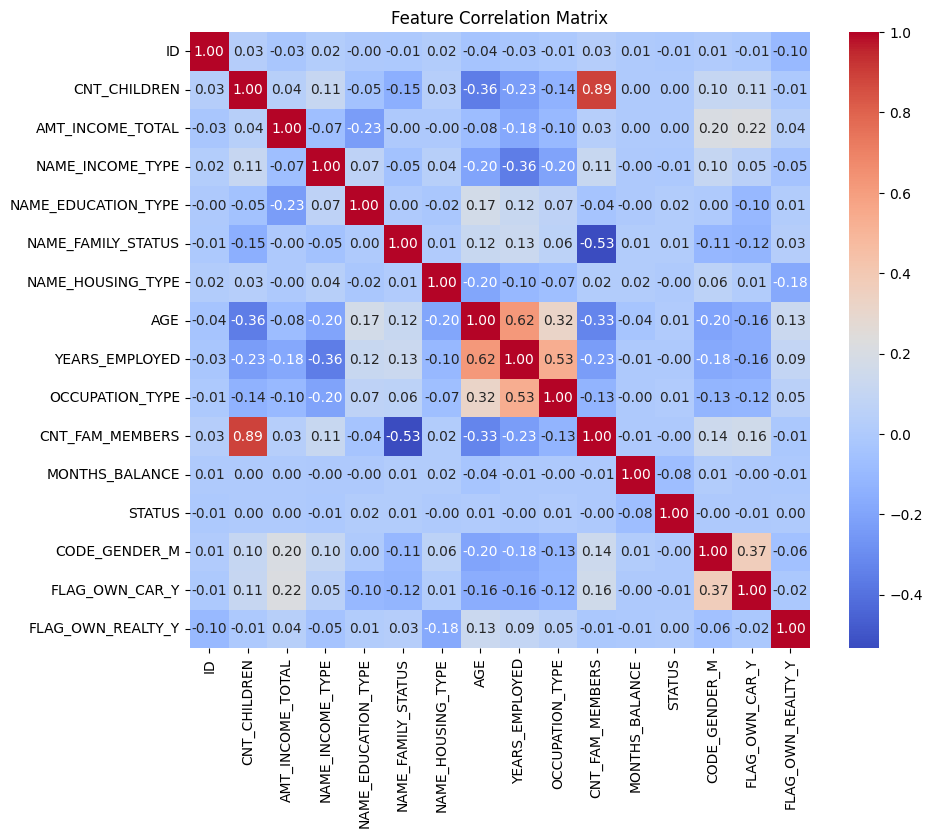

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_transformed.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
# Step 1: Aggregate STATUS behavior per ID
status_summary = df_transformed.groupby('ID').agg({
    'STATUS': ['max', 'mean', lambda x: (x >= 2).sum()]  # worst, average, count of serious overdues
})
status_summary.columns = ['STATUS_MAX', 'STATUS_MEAN', 'NUM_OVERDUE_2_PLUS']
status_summary.reset_index(inplace=True)

# Step 2: Define APPROVED target (1 = good behavior, 0 = bad behavior)
status_summary['APPROVED'] = status_summary['STATUS_MAX'].apply(lambda x: 1 if x < 2 else 0)

# Step 3: Aggregate remaining features (take first occurrence per person)
static_features = df_transformed.groupby('ID').first().reset_index()

# Step 4: Merge both on ID
final_df = static_features.merge(status_summary, on='ID')

# Step 5: Optional - Drop STATUS and any repeated columns
final_df.drop(columns=['STATUS'], inplace=True)

In [ ]:
final_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,STATUS_MAX,STATUS_MEAN,NUM_OVERDUE_2_PLUS,APPROVED
0,5008804,0,427500.0,4,1,0,4,32,12,18,2.0,0,1,1,1,2.0,0.125000,1,0
1,5008805,0,427500.0,4,1,0,4,32,12,18,2.0,0,1,1,1,2.0,0.133333,1,0
2,5008806,0,112500.0,4,4,1,1,58,3,16,2.0,0,1,1,1,1.0,-0.300000,0,1
3,5008808,0,270000.0,0,4,3,1,52,8,14,1.0,0,0,0,1,1.0,-0.200000,0,1
4,5008809,0,270000.0,0,4,3,1,52,8,14,1.0,-22,0,0,1,-1.0,-1.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,1,157500.0,4,4,1,1,29,4,3,3.0,-11,0,1,1,1.0,0.666667,0,1
36453,5150483,1,157500.0,4,4,1,1,29,4,3,3.0,0,0,1,1,-1.0,-1.000000,0,1
36454,5150484,1,157500.0,4,4,1,1,29,4,3,3.0,0,0,1,1,1.0,0.923077,0,1
36455,5150485,1,157500.0,4,4,1,1,29,4,3,3.0,0,0,1,1,1.0,1.000000,0,1


In [ ]:
# Step 7: Check how many are approved vs rejected
approval_counts = final_df['APPROVED'].value_counts()
print("Approval distribution:")
print(approval_counts)

Approval distribution:
APPROVED
1    32166
0     4291
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
num_cols = ['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'STATUS_MAX', 'STATUS_MEAN', 'NUM_OVERDUE_2_PLUS']
final_df[num_cols] = scaler.fit_transform(final_df[num_cols])


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 7: Prepare features manually
X = final_df.drop(columns=['APPROVED', 'ID', 'STATUS_MAX', 'NUM_OVERDUE_2_PLUS'])
y = final_df['APPROVED']

# Step 8: Oversample minority class with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 9: Train/Validation/Test Split (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled, test_size=0.4, stratify=y_resampled, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Step 10: Print shapes and confirm features used
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)
print("Features used:", list(X.columns))


Train set: (38599, 15)
Validation set: (12866, 15)
Test set: (12867, 15)
Features used: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'YEARS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y', 'STATUS_MEAN']


In [ ]:
X_resampled

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,STATUS_MEAN
0,0,2.365845,4,1,0,4,-0.978287,-0.435627,18,2.0,0,1,1,1,-0.291861
1,0,2.365845,4,1,0,4,-0.978287,-0.435627,18,2.0,0,1,1,1,-0.278301
2,0,-0.728827,4,4,1,1,1.280568,-0.459845,16,2.0,0,1,1,1,-0.983401
3,0,0.818509,0,4,3,1,0.759294,-0.446391,14,1.0,0,0,0,1,-0.820686
4,0,0.818509,0,4,3,1,0.759294,-0.446391,14,1.0,-22,0,0,1,-2.122408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64327,0,0.818509,1,4,3,1,1.438334,2.222885,18,1.0,0,0,0,1,0.893028
64328,2,-0.090725,0,1,1,1,-0.100989,-0.454011,14,4.0,0,0,0,0,0.791878
64329,0,-0.064502,0,4,0,1,0.631804,-0.398585,8,2.0,0,0,0,0,0.612377
64330,0,-1.001361,4,4,1,1,0.501080,-0.449374,3,2.0,0,0,0,1,-0.145148


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
   # 'min_samples_split': [2, 5, 10]
}

# Setup RandomForest with Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Run Grid Search on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)

# Performance report
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Optional: Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'max_depth': None, 'n_estimators': 200}

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6433
           1       0.93      0.95      0.94      6433

    accuracy                           0.94     12866
   macro avg       0.94      0.94      0.94     12866
weighted avg       0.94      0.94      0.94     12866

Confusion Matrix:
[[5951  482]
 [ 314 6119]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Report performance
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6434
           1       0.93      0.95      0.94      6433

    accuracy                           0.94     12867
   macro avg       0.94      0.94      0.94     12867
weighted avg       0.94      0.94      0.94     12867

Test Set Confusion Matrix:
[[5953  481]
 [ 328 6105]]


In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy on all sets
train_acc = accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9995
Validation Accuracy: 0.9381
Test Accuracy: 0.9371


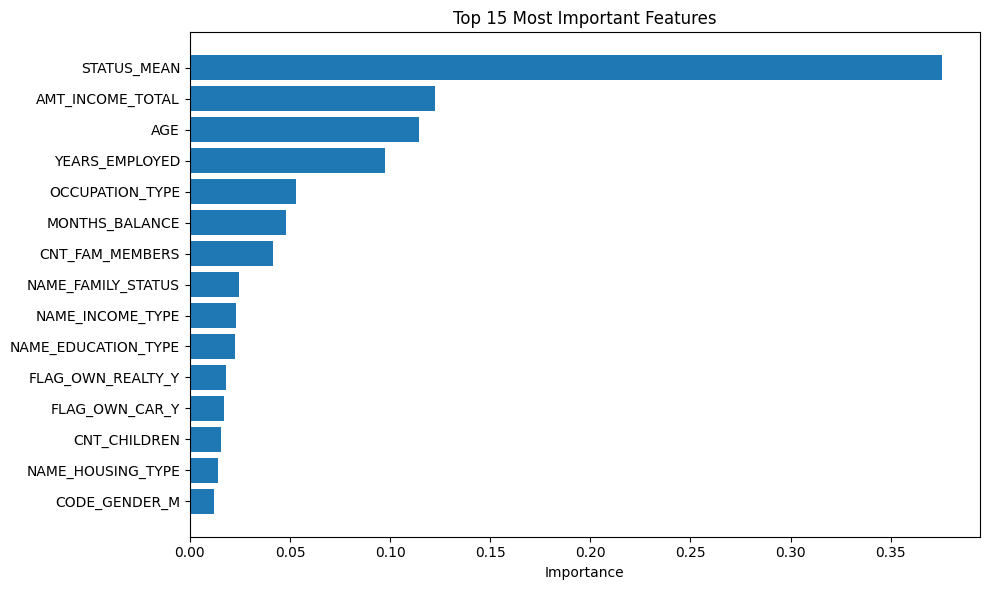

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = grid_search.best_estimator_.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Most Important Features")
plt.tight_layout()
plt.show()
